In [46]:
import numpy as np
import csv
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
cmap = mpl.colormaps['viridis']
norm = mpl.colors.Normalize(vmin=0, vmax=8)

In [47]:
df = pd.read_csv('Merged_data.csv', index_col=False)
df['10gen']=0
df

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,IpMispredict,BpTkBranch,MLP,SPEC_speed_score,10gen
0,500.perlbench_r,8161831361,25741624,19244473297,1661700474,34112016,11,240354,98.45,3.64,439.30,2.03,1.39,1.000000,0
1,500.perlbench_r,16524592463,51543983,39867315327,3238937052,74501671,19,395540,108.91,3.65,400.45,2.05,1.36,1.000000,0
2,500.perlbench_r,24845507433,78831602,60442673577,4837212858,114823505,34,552608,112.42,3.65,389.37,2.06,1.35,1.000000,0
3,500.perlbench_r,33099307131,104275450,81237734926,6379915775,155716591,42,705694,114.11,3.65,383.99,2.07,1.35,1.000000,0
4,500.perlbench_r,41358873306,130200148,101910825510,7948209890,195524777,50,868384,115.31,3.65,399.80,2.07,1.36,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13225,554.roms_r,1656124876334,46950381286,1455944521876,893714948016,445831654,2316,465612,208.79,2.18,3320.62,1.60,5.82,1.212946,0
13226,554.roms_r,1664176734600,47170795999,1463233119438,898035966313,447903470,2323,468423,208.91,2.18,3319.15,1.60,5.82,1.212946,0
13227,554.roms_r,1672220978116,47403733115,1469600086046,902527029497,449987320,2332,471534,208.81,2.18,3321.06,1.60,5.82,1.212946,0
13228,554.roms_r,1680264760294,47625731348,1477071885703,906791962979,452169497,2337,474207,209.03,2.18,3321.06,1.60,5.82,1.212946,0


In [48]:
df.columns
#cycle_activity.stalls_total == stalled-cycles-backend
#IpCall == IpNreturn

Index(['workload', 'cycles', 'cache-misses', 'instructions',
       'cycle_activity.stalls_total', 'branch-misses', 'context-switches',
       'iTLB-load-misses', 'IpCall', 'IpLoad', 'IpMispredict', 'BpTkBranch',
       'MLP', 'SPEC_speed_score', '10gen'],
      dtype='object')

In [49]:
workloads={
    '500.perlbench_r':0,
    '502.gcc_r':1,
    '505.mcf_r':2,
    '507.cactuBSSN_r':3,
    '508.namd_r':4,
    '510.parest_r':5,
    '511.povray_r':6,
    '519.lbm_r':7,
    '520.omnetpp_r':8,
    '523.xalancmbk_r':9,
    '525.x264_r':10,
    '526.blender_r':11,
    '531.deepsjeng_r':12,
    '538.imagick_r':13,
    '541.leela_r':14,
    '544.nab_r':15,
    '548.exchange2_r':16,
    '549.fotonik3d_r':17,
    '554.roms_r':18,
    '557.xz_r':19
}
df['wkld']=df['workload']
df=pd.get_dummies(df, columns=['wkld'])
df['workload']=df['workload'].astype('category').map(workloads)
# df=df.drop(['IpLoad', 'MLP'], axis=1)
df

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,...,wkld_523.xalancmbk_r,wkld_526.blender_r,wkld_527.cam4_r,wkld_531.deepsjeng_r,wkld_538.imagick_r,wkld_541.leela_r,wkld_544.nab_r,wkld_548.exchange2_r,wkld_554.roms_r,wkld_557.xz_r
0,0.0,8161831361,25741624,19244473297,1661700474,34112016,11,240354,98.45,3.64,...,False,False,False,False,False,False,False,False,False,False
1,0.0,16524592463,51543983,39867315327,3238937052,74501671,19,395540,108.91,3.65,...,False,False,False,False,False,False,False,False,False,False
2,0.0,24845507433,78831602,60442673577,4837212858,114823505,34,552608,112.42,3.65,...,False,False,False,False,False,False,False,False,False,False
3,0.0,33099307131,104275450,81237734926,6379915775,155716591,42,705694,114.11,3.65,...,False,False,False,False,False,False,False,False,False,False
4,0.0,41358873306,130200148,101910825510,7948209890,195524777,50,868384,115.31,3.65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13225,18.0,1656124876334,46950381286,1455944521876,893714948016,445831654,2316,465612,208.79,2.18,...,False,False,False,False,False,False,False,False,True,False
13226,18.0,1664176734600,47170795999,1463233119438,898035966313,447903470,2323,468423,208.91,2.18,...,False,False,False,False,False,False,False,False,True,False
13227,18.0,1672220978116,47403733115,1469600086046,902527029497,449987320,2332,471534,208.81,2.18,...,False,False,False,False,False,False,False,False,True,False
13228,18.0,1680264760294,47625731348,1477071885703,906791962979,452169497,2337,474207,209.03,2.18,...,False,False,False,False,False,False,False,False,True,False


In [50]:
df.columns

Index(['workload', 'cycles', 'cache-misses', 'instructions',
       'cycle_activity.stalls_total', 'branch-misses', 'context-switches',
       'iTLB-load-misses', 'IpCall', 'IpLoad', 'IpMispredict', 'BpTkBranch',
       'MLP', 'SPEC_speed_score', '10gen', 'wkld_500.perlbench_r',
       'wkld_502.gcc_r', 'wkld_503.bwaves_r', 'wkld_505.mcf_r',
       'wkld_507.cactuBSSN_r', 'wkld_508.namd_r', 'wkld_510.parest_r',
       'wkld_511.povray_r', 'wkld_519.lbm_r', 'wkld_520.omnetpp_r',
       'wkld_521.wrf_r', 'wkld_523.xalancmbk_r', 'wkld_526.blender_r',
       'wkld_527.cam4_r', 'wkld_531.deepsjeng_r', 'wkld_538.imagick_r',
       'wkld_541.leela_r', 'wkld_544.nab_r', 'wkld_548.exchange2_r',
       'wkld_554.roms_r', 'wkld_557.xz_r'],
      dtype='object')

In [51]:
wkll=['500.perlbench_r', '502.gcc_r', '505.mcf_r', '507.cactuBSSN_r', '508.namd_r', '510.parest_r', '511.povray_r', '519.lbm_r', '520.omnetpp_r', '523.xalancmbk_r', '525.x264_r', '526.blender_r', '531.deepsjeng_r', '538.imagick_r', '541.leela_r', '544.nab_r', '548.exchange2_r', '549.fotonik3d_r', '554.roms_r', '557.xz_r']

In [52]:
# Separating features and target into numpy arrays

X=np.array(df.loc[:, 'cycles':'BpTkBranch'])
y=np.array(df['SPEC_speed_score']).reshape(-1, 1)

In [53]:
models = ['LR', 'DT', 'RF', 'XGB', 'KNN', 'MLP']
estimator = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), KNeighborsRegressor(),
             MLPRegressor(max_iter=300)]

In [54]:
df7 = pd.read_csv('dataset_i7-10gen.csv', index_col=False)
df7['10gen']=1
df7

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,IpMispredict,BpTkBranch,MLP,SPEC_speed_score,10gen
0,500.perlbench_r,6742418749,24738219,14777065610,1290489683,25931114,43,224310,84.050,3.60,567.760,1.98,1.430,0.929091,1
1,500.perlbench_r,13515839400,52639694,30339255344,2609967526,57384047,86,387548,90.420,3.58,526.910,2.02,1.390,0.929091,1
2,500.perlbench_r,20269282411,81243476,45767430997,3953043070,88492177,151,547194,92.790,3.59,516.373,2.03,1.380,0.929091,1
3,500.perlbench_r,27034596132,108140821,61506178913,5247501412,119763720,196,699451,93.743,3.57,512.640,2.04,1.370,0.929091,1
4,500.perlbench_r,33866874531,135170123,77567161380,6546652740,152187232,218,860821,94.417,3.57,508.460,2.04,1.367,0.929091,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,554.roms_r,1351747278242,65444061766,2154890843621,465353768082,297875734,1298,5345601,322.013,2.19,7131.017,1.38,2.233,0.945555,1
4406,554.roms_r,1358356698313,65756756000,2165270084203,467624238994,299310088,1303,5356091,321.813,2.19,7131.593,1.38,2.233,0.945555,1
4407,554.roms_r,1364972729951,66075291039,2175616288842,469915794825,300763135,1308,5361899,321.697,2.20,7132.273,1.38,2.233,0.945555,1
4408,554.roms_r,1371571931049,66401105442,2185878694983,472232777975,302231266,1313,5368705,321.797,2.20,7132.777,1.38,2.230,0.945555,1


In [55]:
df7['wkld']=df7['workload']
df7=pd.get_dummies(df7, columns=['wkld'])
df7['workload']=df7['workload'].astype('category').map(workloads)
df7

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,...,wkld_523.xalancmbk_r,wkld_526.blender_r,wkld_527.cam4_r,wkld_531.deepsjeng_r,wkld_538.imagick_r,wkld_541.leela_r,wkld_544.nab_r,wkld_548.exchange2_r,wkld_554.roms_r,wkld_557.xz_r
0,0.0,6742418749,24738219,14777065610,1290489683,25931114,43,224310,84.050,3.60,...,False,False,False,False,False,False,False,False,False,False
1,0.0,13515839400,52639694,30339255344,2609967526,57384047,86,387548,90.420,3.58,...,False,False,False,False,False,False,False,False,False,False
2,0.0,20269282411,81243476,45767430997,3953043070,88492177,151,547194,92.790,3.59,...,False,False,False,False,False,False,False,False,False,False
3,0.0,27034596132,108140821,61506178913,5247501412,119763720,196,699451,93.743,3.57,...,False,False,False,False,False,False,False,False,False,False
4,0.0,33866874531,135170123,77567161380,6546652740,152187232,218,860821,94.417,3.57,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,18.0,1351747278242,65444061766,2154890843621,465353768082,297875734,1298,5345601,322.013,2.19,...,False,False,False,False,False,False,False,False,True,False
4406,18.0,1358356698313,65756756000,2165270084203,467624238994,299310088,1303,5356091,321.813,2.19,...,False,False,False,False,False,False,False,False,True,False
4407,18.0,1364972729951,66075291039,2175616288842,469915794825,300763135,1308,5361899,321.697,2.20,...,False,False,False,False,False,False,False,False,True,False
4408,18.0,1371571931049,66401105442,2185878694983,472232777975,302231266,1313,5368705,321.797,2.20,...,False,False,False,False,False,False,False,False,True,False


In [56]:
df7.columns

Index(['workload', 'cycles', 'cache-misses', 'instructions',
       'cycle_activity.stalls_total', 'branch-misses', 'context-switches',
       'iTLB-load-misses', 'IpCall', 'IpLoad', 'IpMispredict', 'BpTkBranch',
       'MLP', 'SPEC_speed_score', '10gen', 'wkld_500.perlbench_r',
       'wkld_502.gcc_r', 'wkld_503.bwaves_r', 'wkld_505.mcf_r',
       'wkld_507.cactuBSSN_r', 'wkld_508.namd_r', 'wkld_510.parest_r',
       'wkld_511.povray_r', 'wkld_519.lbm_r', 'wkld_520.omnetpp_r',
       'wkld_521.wrf_r', 'wkld_523.xalancmbk_r', 'wkld_526.blender_r',
       'wkld_527.cam4_r', 'wkld_531.deepsjeng_r', 'wkld_538.imagick_r',
       'wkld_541.leela_r', 'wkld_544.nab_r', 'wkld_548.exchange2_r',
       'wkld_554.roms_r', 'wkld_557.xz_r'],
      dtype='object')

In [57]:
# Separating features and target into numpy arrays
# for df_column in df7.columns:
#   chk=0
#   for df7_column in df.columns:
#     if df_column==df7_column:
#       chk=1
#   if(chk==0):
#     print(df_column)
X7=np.array(df7.loc[:, 'cycles':'BpTkBranch'])
y7=np.array(df7['SPEC_speed_score']).reshape(-1, 1)

In [58]:
# print(X[0])
# print(X7[0])
print(X.shape)
print(X7.shape)
X75 = np.concatenate((X, X7))
X75.shape

(13230, 11)
(4410, 11)


(17640, 11)

In [59]:
# Principal Component Analysis of i5 & AMD combined datasets

# scaler = StandardScaler().fit(X75)
# X75sc = scaler.transform(X75)          # Z-transform all column values
# pca=PCA(n_components=X75.shape[1])
# pca.fit(X75sc)
# X75_pca=pca.transform(X75sc)
# print("Axis  Variance covered by PCA:")
# for i in range(8): print('%3d %15f'%(i+1, pca.explained_variance_ratio_[i]*100))
# fig = plt.figure(figsize=(8,7))
# ax = fig.add_subplot(111)
# scatter1=ax.scatter(X75_pca[:14490:5, 0], X75_pca[:14490:5, 1], 7, list(df['workload'])[::5], '^')
# scatter2=ax.scatter(X75_pca[14490::5, 0], X75_pca[14490::5, 1], 5, list(df['workload'])[::5], 'o')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# leg1 = ax.legend(handles=scatter1.legend_elements(num=23)[0], labels=workloads.keys(), title="workload", prop={'size': 7})
# leg2 = ax.legend([scatter1,scatter2],['merged','i7_10gen'], title="processor", loc='upper center')
# ax.add_artist(leg1)

In [60]:
# Train on i5 + 'x' rows of AMD, test on remaining AMD
lo, hi, jmp = 0, 201, 10             # training size range
iters = (hi-lo-1)//jmp + 1
print(iters)
iters=iters-1
print(X7.shape[0])
score = np.zeros((iters, len(models)))
mae = np.zeros((iters, len(models)))
mse = np.zeros((iters, len(models)))
indices = np.arange(X7.shape[0])
step = 210
all_indices=np.array([], dtype=int)
train_idx= np.array([], dtype=int)
all_indices=np.concatenate((all_indices, np.arange(0,4410,210)))
w = []
w.append(0)    # Add 0 to the list, equivalent to w[0] = 0 if w had an element
w.append(210)  # Add 210 to the list, now w[1] = 210
w.append(1890) # Add 1890, now w[2] = 1890
w.append(2310) # Add 2310
w.append(2940) # Add 2940, now w[4] = 2940

rem_indices = np.setdiff1d(all_indices, w)
for i in range(210):
  for j in range(5):
    train_idx = np.concatenate((train_idx, [w[j] + i]))
# Maximum value to reach in the addition pattern
max_value = 2100
test_max_value=4410
# for trs in range (iters):
#   test_idx=np.concatenate((test_idx, np.arange(20+trs, test_max_value , step)))
# iters=int(iters/2)
# print(iters)
for i in range(len(rem_indices)):
  for trs in range(5):
      # train_idx = np.concatenate((train_idx, np.arange(trs,max_value , step)))
      # for j in range(10):
      #   test_idx=np.concatenate((test_idx,[2730+trs*10+j]))
      # test_idx=np.setdiff1d(indices,train_idx)
      # print(train_idx)
      # print(test_idx)
      test_idx = np.array([], dtype=int)
      test_idx=np.concatenate((test_idx,[rem_indices[i]+10*(trs+1)-1]))
      X75_train, y75_train = np.concatenate((X, X7[train_idx])), np.concatenate((y, y7[train_idx]))
      X7_test, y7_test = X7[test_idx], y7[test_idx]
      X_scaler, y_scaler = StandardScaler().fit(X75_train), StandardScaler().fit(y75_train)
      X75_train = np.concatenate((X_scaler.transform(X75_train), np.concatenate((df.iloc[:,-24:], df7.iloc[train_idx,-24:]))), axis=1)
      X7_test   = np.concatenate((X_scaler.transform(X7_test)  , df7.iloc[test_idx,-24:]), axis=1)
      y75_train, y7_test = y_scaler.transform(y75_train), y_scaler.transform(y7_test)
      y7_test_reshaped = y7_test.reshape(-1, 1)
      original_y7_test = y_scaler.inverse_transform(y7_test_reshaped)
      with np.printoptions(precision=10):
            print(original_y7_test)
      new_row=[]
      new_row.append(rem_indices[i])
      new_row.append(10*(trs+1))
      float_original_y7_test=float(original_y7_test[0][0])
      new_row.append(float_original_y7_test)
      for model in range(len(models)):
          e = estimator[model].fit(X75_train, y75_train.ravel())
          # score[trs][model] = e.score(X7_test, y7_test)
          y_pred = e.predict(X7_test)
          # print(type(y_pred),y_pred)
          mae[trs][model] = mean_absolute_error(y_true=y7_test, y_pred=y_pred)
          mse[trs][model] = mean_squared_error(y_true=y7_test, y_pred=y_pred)
          y_pred_reshaped = y_pred.reshape(-1, 1)

          # Now you can safely inverse transform
          original_y_pred = y_scaler.inverse_transform(y_pred_reshaped)

          original_y_pred_float = float(original_y_pred[0][0])

          with np.printoptions(precision=10):
            print(trs, model, original_y_pred_float)
          new_row.append(original_y_pred_float)
      with open('result.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(new_row)
# train_idx, test_idx = np.zeros((0), dtype=np.int8), indices
# for trs in range(iters):
#     if trs > 0:
#         trainpool_idx, test_idx = train_test_split(test_idx, train_size=jmp)
#         train_idx = np.concatenate((train_idx, trainpool_idx))
#     X75_train, y75_train = np.concatenate((X, X7[train_idx])), np.concatenate((y, y7[train_idx]))
#     X7_test, y7_test = X7[test_idx], y7[test_idx]
#     X_scaler, y_scaler = StandardScaler().fit(X75_train), StandardScaler().fit(y75_train)
#     X75_train = np.concatenate((X_scaler.transform(X75_train), np.concatenate((df.iloc[:,-24:], df7.iloc[train_idx,-24:]))), axis=1)
#     X7_test   = np.concatenate((X_scaler.transform(X7_test)  , df7.iloc[test_idx,-24:]), axis=1)
#     y75_train, y7_test = y_scaler.transform(y75_train), y_scaler.transform(y7_test)
#     print(X75_train.shape[0], X7_test.shape[0])

#     for model in range(len(models)):
#         e = estimator[model].fit(X75_train, y75_train.ravel())
#         score[trs][model] = e.score(X7_test, y7_test)
#         y_pred = e.predict(X7_test)
#         mae[trs][model] = mean_absolute_error(y_true=y7_test, y_pred=y_pred)
#         mse[trs][model] = mean_squared_error(y_true=y7_test, y_pred=y_pred)

21
4410
[[0.905959768]]
0 0 0.905959768000012
0 1 0.9391380345999996
0 2 0.9308649452590001
0 3 0.9346081614494324
0 4 1.0
0 5 0.9361888751510707
[[0.905959768]]
1 0 0.905959768000012
1 1 0.9290912758999994
1 2 0.930953448421
1 3 0.9346081614494324
1 4 1.0
1 5 0.9437328236898896
[[0.905959768]]
2 0 0.905959768000012
2 1 0.933516434
2 2 0.9305348614610001
2 3 0.9346081614494324
2 4 1.0
2 5 0.9440333530771285
[[0.905959768]]
3 0 0.905959768000012
3 1 0.933516434
3 2 0.9306759745100001
3 3 0.9346081614494324
3 4 1.0
3 5 0.9192134295063489
[[0.905959768]]
4 0 0.9059597680000118
4 1 0.9335164339999998
4 2 0.930788406522
4 3 0.9346081614494324
4 4 1.0
4 5 0.9062674203098646
[[0.7631968182]]
0 0 0.763196818200012
0 1 0.7805988158999999
0 2 0.742553916734
0 3 0.750281810760498
0 4 1.106108281
0 5 0.7908989443588177
[[0.7631968182]]
1 0 0.763196818200012
1 1 0.780598815900001
1 2 0.735545645835
1 3 0.750281810760498
1 4 1.106108281
1 5 0.851826061524521
[[0.7631968182]]
2 0 0.763196818200012
2 

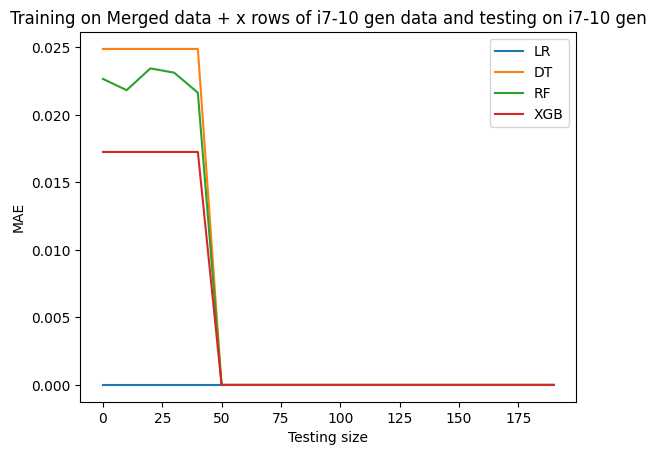

In [68]:

l=0

hi=191
jmp=10
for model in range(4):
    plt.plot(range(l, hi, jmp), mae[l//10:, model], label=models[model])
# plt.plot(range(l, hi, jmp), mse[l//10:, 5], label=models[5], color='y')
plt.legend()
plt.title('Training on Merged data + x rows of i7-10 gen data and testing on i7-10 gen')
plt.xlabel('Testing size')
plt.ylabel('MAE')
plt.show()